In [1]:
# Load libraries
import pandas as pd 
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import plotly.express as px
import os
import math

from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

import openpyxl
import bibtexparser
from bibtexparser.bibdatabase import BibDatabase
from bibtexparser.bwriter import BibTexWriter

from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl import load_workbook

from sklearn.cluster import KMeans

In [2]:
publications_outside_scopus=np.load('publications_outside_scopus.npy')
len(publications_outside_scopus)

8459

In [3]:
publications_with_errors=np.load('publications_with_errors.npy')
len(publications_with_errors)

3407

In [4]:
# Load the data
graph_df=pd.read_excel('graph_df.xlsx')


# Create a G graph between restaurants and customers
G=nx.from_pandas_edgelist(graph_df,
                        target='primary_list',
                        source='secondary_list') 

In [5]:
# JMM: I made a few changes here.
def plot_the_G_graph(G, color='skyblue', layout=nx.spring_layout):
    #Choose a title for the graph
    title = 'Interconnection of papers in their population'

    #Establish which categories will appear when hovering over each node
    HOVER_TOOLTIPS = [("Scopus eid", "@index")]

    #Create a plot — set dimensions, toolbar, and title
    plot = figure(width=1400, height=700,tooltips = HOVER_TOOLTIPS,
                tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)
    network_graph = from_networkx(G, layout, scale=10, center=(0, 0), )

    #Set node size and color
    network_graph.node_renderer.glyph = Circle(size=7, fill_color=color)

    #Set edge opacity and width
    network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

    #Add network graph to the plot
    plot.renderers.append(network_graph)

    show(plot)

Graph with 705 nodes and 3083 edges


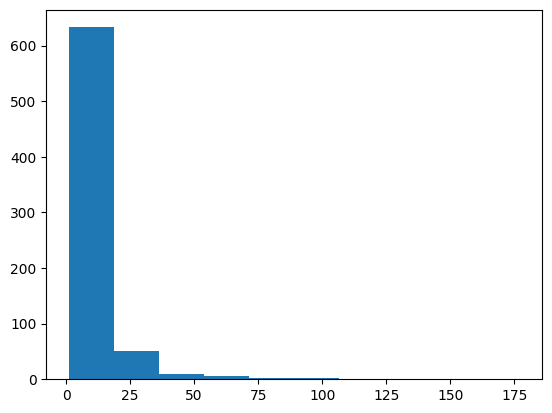

In [6]:
# The histogram showing how many edges (connectionwith other papers) each node (article) has 
plt.hist([v for k,v in nx.degree(G)])
plt.show
print(G)
# Plot a graph 
plot_the_G_graph(G,)

In [7]:
# The degrees of each paper in descending order 
sorted(G.degree, key=lambda x: x[1], reverse=True)

# The eccentricity of a node v is the maximum distance from v to all other nodes in G.

[('2-s2.0-85049520047', 177),
 ('2-s2.0-85092273579', 94),
 ('2-s2.0-85138640110', 91),
 ('2-s2.0-85085924004', 82),
 ('2-s2.0-84919921209', 80),
 ('2-s2.0-85028807082', 78),
 ('2-s2.0-84979468678', 70),
 ('2-s2.0-85029374476', 64),
 ('2-s2.0-85041306244', 64),
 ('2-s2.0-84875689316', 64),
 ('2-s2.0-85073705053', 60),
 ('2-s2.0-85044343404', 56),
 ('2-s2.0-85021307168', 53),
 ('2-s2.0-84956859620', 48),
 ('2-s2.0-80053358803', 47),
 ('2-s2.0-85033411166', 46),
 ('2-s2.0-84937231895', 44),
 ('2-s2.0-85031743556', 43),
 ('2-s2.0-85063735757', 42),
 ('2-s2.0-85123475967', 42),
 ('2-s2.0-84956861441', 40),
 ('2-s2.0-85029510171', 36),
 ('2-s2.0-85126579793', 36),
 ('2-s2.0-85046252866', 36),
 ('2-s2.0-85035119909', 35),
 ('2-s2.0-85006993290', 32),
 ('2-s2.0-84962291206', 31),
 ('2-s2.0-85093824305', 30),
 ('2-s2.0-85030627986', 30),
 ('2-s2.0-85016451814', 30),
 ('2-s2.0-85140738627', 30),
 ('2-s2.0-85068795053', 29),
 ('2-s2.0-84995916499', 29),
 ('2-s2.0-85049516953', 28),
 ('2-s2.0-850

In [8]:
# Checking the bridges (if we remove a bridge then the population is splitted for additonal part)
bridges=list(nx.bridges(G))
print('Number of bridges is',len(bridges))
bridges

Number of bridges is 124


[('2-s2.0-85049520047', '2-s2.0-85097149889'),
 ('2-s2.0-85049520047', '2-s2.0-85101386251'),
 ('2-s2.0-85049520047', '2-s2.0-85127076174'),
 ('2-s2.0-85049520047', '2-s2.0-84897726105'),
 ('2-s2.0-85049520047', '2-s2.0-84904359753'),
 ('2-s2.0-85138640110', '2-s2.0-84949924293'),
 ('2-s2.0-85138640110', '2-s2.0-84991406679'),
 ('2-s2.0-85138640110', '2-s2.0-85077767247'),
 ('2-s2.0-85138640110', '2-s2.0-85097337433'),
 ('2-s2.0-85138640110', '2-s2.0-85099585571'),
 ('2-s2.0-85138640110', '2-s2.0-85099585940'),
 ('2-s2.0-85138640110', '2-s2.0-85075422925'),
 ('2-s2.0-85138640110', '2-s2.0-85084285284'),
 ('2-s2.0-85085924004', '2-s2.0-85034791984'),
 ('2-s2.0-85085924004', '2-s2.0-85138751514'),
 ('2-s2.0-85085924004', '2-s2.0-85050335738'),
 ('2-s2.0-85085924004', '2-s2.0-85066607030'),
 ('2-s2.0-84979468678', '2-s2.0-85050250778'),
 ('2-s2.0-84979468678', '2-s2.0-85051202345'),
 ('2-s2.0-85028697291', '2-s2.0-85124701040'),
 ('2-s2.0-84908146702', '2-s2.0-85133731655'),
 ('2-s2.0-849

In [9]:
 # Graph (G2) without bridges
G2=G.copy() # copy a graph as G2

for bridge in bridges: # for each bridge 
    
    # Remove an edge (the bridge)
    G2.remove_edge(*bridge)

# Plot a graph 
plot_the_G_graph(G2)

<class 'networkx.utils.decorators.argmap'> compilation 34:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


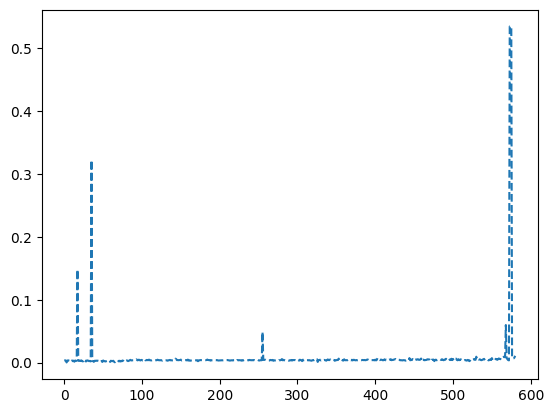

In [10]:
# Remove nodes from 
G2.remove_nodes_from(list(nx.isolates(G2)))

G = G2.copy()

# Use networkx function to get the fiedler vector
fv = nx.fiedler_vector(G)
fv.resize((len(fv),1))

# Or get it from the Laplacian Matrix
L=nx.linalg.laplacian_matrix(G).todense()
val,vec = np.linalg.eig(L)
val_sorted = np.argsort(val)
# The Fiedler vector correspond to the smallest non-zero eigenvalue
# idx_fiedler = val_sorted[np.where(val[val_sorted]>0)[0][0]] # <- Same as above.
# idx_fiedler = val_sorted[0]
idx_fiedler = val_sorted[1]
fv2=np.array(vec[:,idx_fiedler], dtype=np.float64)


plt.figure()
# plt.plot(np.abs(fv))
plt.plot(np.abs(fv),'--')
# # plt.plot(fv2,'--')
# # print(vec[:,i[0]].shape)
# print(val[i[1]])

In [98]:
# Use clusterization algorithm on the Fiedler vector.
from random import randint
K = 8
colors_table = []
for i in range(K):
    colors_table.append('#%06X' % randint(0, 0xFFFFFF))


kmeans_model=KMeans(n_clusters=K).fit(fv)
cluster_labels=kmeans_model.labels_
# colors_table = ['red','green','blue','magenta','cyan','yellow']
colors = [colors_table[i] for i in cluster_labels]
colors = dict(zip(G.nodes, colors))

# Add the colors as an attribute of the nodes.
nx.set_node_attributes(G, {k:v for k,v in colors.items()},'colors' )

# Plot the complete graph.
pos = nx.multipartite_layout(G, subset_key="colors")
plot_the_G_graph(G, color='colors')#, layout=pos)

In [99]:
# Plot the sub-graphs formed by the labeled nodes. Ideally, they should be highly 
# connected, with some few unconnected nodes. 
nodes = list(G.nodes())
for label in np.unique(cluster_labels):
    nodes_out = np.where(cluster_labels!=label)[0].tolist()
    # print(nodes_out[0].tolist())
    G_aux = G.copy()
    for node_out in nodes_out:
        G_aux.remove_node(nodes[node_out])
    plot_the_G_graph(G_aux, color='colors')

In [100]:
# Checking the connectivity
print('G2 connectivity:',nx.is_connected(G2)) # False there are more than 1 components in the graph 
print('G connectivity:',nx.is_connected(G)) # True there is only 1 comonent in the graph

connected_components=nx.connected_components(G2)
largest_component=max(connected_components,key=len)
print('Largest component has ',len(largest_component),'papers out of',len(G.degree))
G2_largest=G2.subgraph(largest_component)
plot_the_G_graph(G2_largest)


G2 connectivity: True
G connectivity: True
Largest component has  581 papers out of 581


In [101]:
# The degrees of each paper in descending order 
largest_component_list=list(sorted(G2_largest.degree, key=lambda x: x[1], reverse=True))

# Create a dataframe
largest_component_pd=pd.DataFrame(largest_component_list,columns=['eid','Degree'])

# 
connections=pd.read_excel('connections.xlsx')

# other_components=largest_component_pd[~largest_component_pd.apply(tuple,1).isin(connections.apply(tuple,1))]
largest_component_pd = pd.merge(largest_component_pd, connections,left_on='eid', right_on='eid')


In [102]:
# Function get the bib fil from doi

def get_bib_from_doi(doi):
    import sys
    import urllib.request
    from urllib.error import HTTPError
    BASE_URL = 'http://dx.doi.org/'

    url = BASE_URL + doi
    req = urllib.request.Request(url)
    req.add_header('Accept', 'application/x-bibtex')
    try:
        with urllib.request.urlopen(req) as f:
            bibtex = f.read().decode()
    except: 
        bibtex=0 # needed to return something in case of error
    # except HTTPError as e:
    #     bibtex=0 # needed to return something in case of error
    #     if e.code == 404:
    #         print('DOI not found.')
    #     else:
    #         print('Service unavailable.')
    #     sys.exit(1)
    return bibtex

def bibtex2xlsx_file(bibtex):
    
    # Write data to temporary.bib
    with open('temporary.bib', 'w',encoding="utf-8") as bibfile:
        bibfile.write(bibtex)
    
    # Convert temporary.bib to temporary.xlsx
    with open('temporary.bib',encoding="utf-8") as bibtex_file:
        bib_database = bibtexparser.load(bibtex_file)
    
    # Dataframe with given bibtext
    df_new = pd.DataFrame(bib_database.entries)
    
    # Open xlsx file
    df_old=pd.read_excel('temporary.xlsx', index_col=0)  


    df_concat=pd.concat([df_old,df_new],axis=0, sort = True)
    print(df_concat)
    
    # Save xlsx file
    df_concat.to_excel('temporary.xlsx',index=False)
    

In [103]:
filePath = os.getcwd()
filename="temporary.xlsx"
filePath=filePath+'\\'+filename

if os.path.exists(filePath):
    os.remove(filePath)
wb = openpyxl.Workbook()
wb.save(filePath)

not_analysed_dois=[]
doi_error_count=0
for i in range(len(largest_component_pd['doi'])):
    # Get the doi from the dataframe 
    doi=largest_component_pd['doi'][i]
    
    if doi is None or str(doi)=='nan':
        print('Doi issue')
        doi_error_count+=1
    else:
        # Find a bibtext for given doi
        bibtex=get_bib_from_doi(doi)
        
        if bibtex!=0:    
            # Save into excel 
            bibtex2xlsx_file(bibtex)
        else:
            not_analysed_dois.append(doi)
print('doi errors:',doi_error_count)

BadZipFile: File is not a zip file

In [ ]:
#  Network graph with time axis
print(len(largest_component_pd['doi']))
print(len(not_analysed_dois))


In [ ]:
df_scopus=pd.read_csv('scopus.csv')

df_final=pd.DataFrame()

for eid in largest_component_pd['eid']:
    
    interm_row=df_scopus.loc[df_scopus['EID'] == eid]
    
    df_final=pd.concat([df_final, interm_row])


df_final.to_csv('selected_articles.csv',index=False)
